In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import graphviz
import pyarrow
from sklearn.decomposition import PCA
#from mlxtend.plotting import plot_decision_regions
# from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [3]:

#file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\Award_Batting_HOF_FE.feather'
Awards_Batting_HoF_df = pd.read_feather('Award_Batting_HOF_FE.feather')

Awards_Batting_HoF_df.describe()
# OG
# Awards_Batting_HoF_df = pd.read_feather("Awards_Batting_HoF.feather")

,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,total_RBI,...,total_SF,total_GIDP,max_HR,max_hits,max_SB,total_singles,batting_avg,OBP,SLG,OPS
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,...,2898.000000,2898.00000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
mean,13.481021,1162.531401,3702.406832,516.831608,1005.652864,359.163561,172.131125,35.824362,81.376812,473.518979,...,18.633885,58.71049,12.095238,113.700828,13.493789,716.320566,0.237302,0.293405,0.277594,0.571000
std,3.128667,832.494354,3352.927175,562.771005,1017.838383,405.194060,180.856891,53.427247,123.693842,527.784207,...,26.904121,72.90081,12.630974,70.955541,17.843317,719.704051,0.057119,0.070136,0.079148,0.146865
min,10.000000,140.000000,100.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,2.000000,0.000000,3.000000,0.044554,0.066351,0.044554,0.123767
25%,11.000000,533.250000,937.250000,82.000000,189.000000,50.000000,27.000000,4.000000,5.000000,78.000000,...,0.000000,2.00000,2.000000,28.000000,1.000000,146.250000,0.208139,0.249810,0.228736,0.480428
50%,13.000000,1038.000000,3191.000000,389.500000,824.000000,256.000000,136.000000,20.000000,34.000000,350.000000,...,3.000000,34.00000,8.000000,134.000000,7.000000,583.500000,0.255694,0.315215,0.296192,0.614803
75%,15.000000,1482.750000,5138.500000,722.000000,1400.750000,486.000000,243.000000,46.000000,105.000000,636.000000,...,31.000000,93.00000,19.000000,173.750000,19.000000,1001.000000,0.275159,0.341329,0.333095,0.672707
max,27.000000,5700.000000,21752.000000,3992.000000,7028.000000,3416.000000,1584.000000,618.000000,1146.000000,4152.000000,...,236.000000,630.00000,73.000000,262.000000,138.000000,5286.000000,0.366363,0.480621,0.528340,1.000137


In [4]:
# Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']] = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']].abs()

X = Awards_Batting_HoF_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits',
    'max_SB', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS'
]]

In [5]:
print(Awards_Batting_HoF_df.columns.tolist())
Awards_Batting_HoF_df.info()

['playerID', 'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits', 'total_walks', 'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB', 'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits', 'max_SB', 'HOF_status', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS']
<class 'pandas.core.frame.DataFrame'>
Index: 2898 entries, 1 to 18713
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   playerID         2898 non-null   string  
 1   years_played     2898 non-null   int64   
 2   total_games      2898 non-null   float64 
 3   total_at_bats    2898 non-null   float64 
 4   total_runs       2898 non-null   float64 
 5   total_hits       2898 non-null   float64 
 6   total_walks      2898 non-null   float64 
 7   total_doubles    2898 non-null   float64 
 8   total_triples    2898 non-null   float64 

In [6]:
Awards_Batting_HoF_df.head()

,playerID,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,...,total_GIDP,max_HR,max_hits,max_SB,HOF_status,total_singles,batting_avg,OBP,SLG,OPS
1,aaronha01,23,3298.0,12364.0,2174.0,3771.0,1402.0,624.0,98.0,755.0,...,328.0,47.0,223.0,31.0,True,2294.0,0.304998,0.375781,0.435053,0.810834
25,abernte02,14,681.0,181.0,12.0,25.0,6.0,3.0,0.0,0.0,...,4.0,0.0,4.0,0.0,False,22.0,0.138122,0.165775,0.138122,0.303897
33,abreubo01,18,2425.0,8480.0,1453.0,2470.0,1476.0,574.0,59.0,288.0,...,165.0,31.0,183.0,40.0,False,1549.0,0.291274,0.396344,0.366156,0.762500
55,adairje01,13,1165.0,4019.0,378.0,1022.0,208.0,163.0,19.0,57.0,...,149.0,11.0,153.0,7.0,False,783.0,0.254292,0.290987,0.287385,0.578371
60,adamsba01,19,482.0,1019.0,79.0,216.0,53.0,31.0,15.0,3.0,...,0.0,1.0,33.0,1.0,False,167.0,0.211973,0.250933,0.232581,0.483514


In [7]:
#Awards_Batting_HoF_df = Awards_Batting_HoF_df.drop_duplicates(subset=['playerID'])

In [8]:
# OG
# X = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP']]
X = Awards_Batting_HoF_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits',
    'max_SB', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS'
]].fillna(0)  # Replace NaNs with 0

# Ensure the target variable has no missing values
y = Awards_Batting_HoF_df['HOF_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_1 = LogisticRegression(solver='liblinear')
log_model_1.fit(X_train_scaled, y_train)

y_pred = log_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True).astype(np.int_)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index).astype(np.int_)

# Identify false positives and false negatives
#false_positives = y_test_reset[(y_test_reset == 0) & (y_pred_reset == 1)].index
#false_negatives = y_test_reset[(y_test_reset == 1) & (y_pred_reset == 0)].index

# Extract player details for false positives and false negatives
#false_positive_players = Awards_Batting_HoF_df.loc[false_positives, ['playerID', 'HOF_status']]
#false_negative_players = Awards_Batting_HoF_df.loc[false_negatives, ['playerID', 'HOF_status']]

# Display the results
print("False Positives:")
#print(false_positive_players)

print("\nFalse Negatives:")
#print(false_negative_players)

Confusion Matrix:
[[531   3]
 [ 20  26]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       534
         1.0       0.90      0.57      0.69        46

    accuracy                           0.96       580
   macro avg       0.93      0.78      0.84       580
weighted avg       0.96      0.96      0.96       580

False Positives:

False Negatives:


In [9]:
# Display detailed feature values for false positives
print("\nDetailed Feature Values for False Positives:")
display(Awards_Batting_HoF_df.loc[false_positives, X.columns])


Detailed Feature Values for False Positives:


NameError: name 'false_positives' is not defined

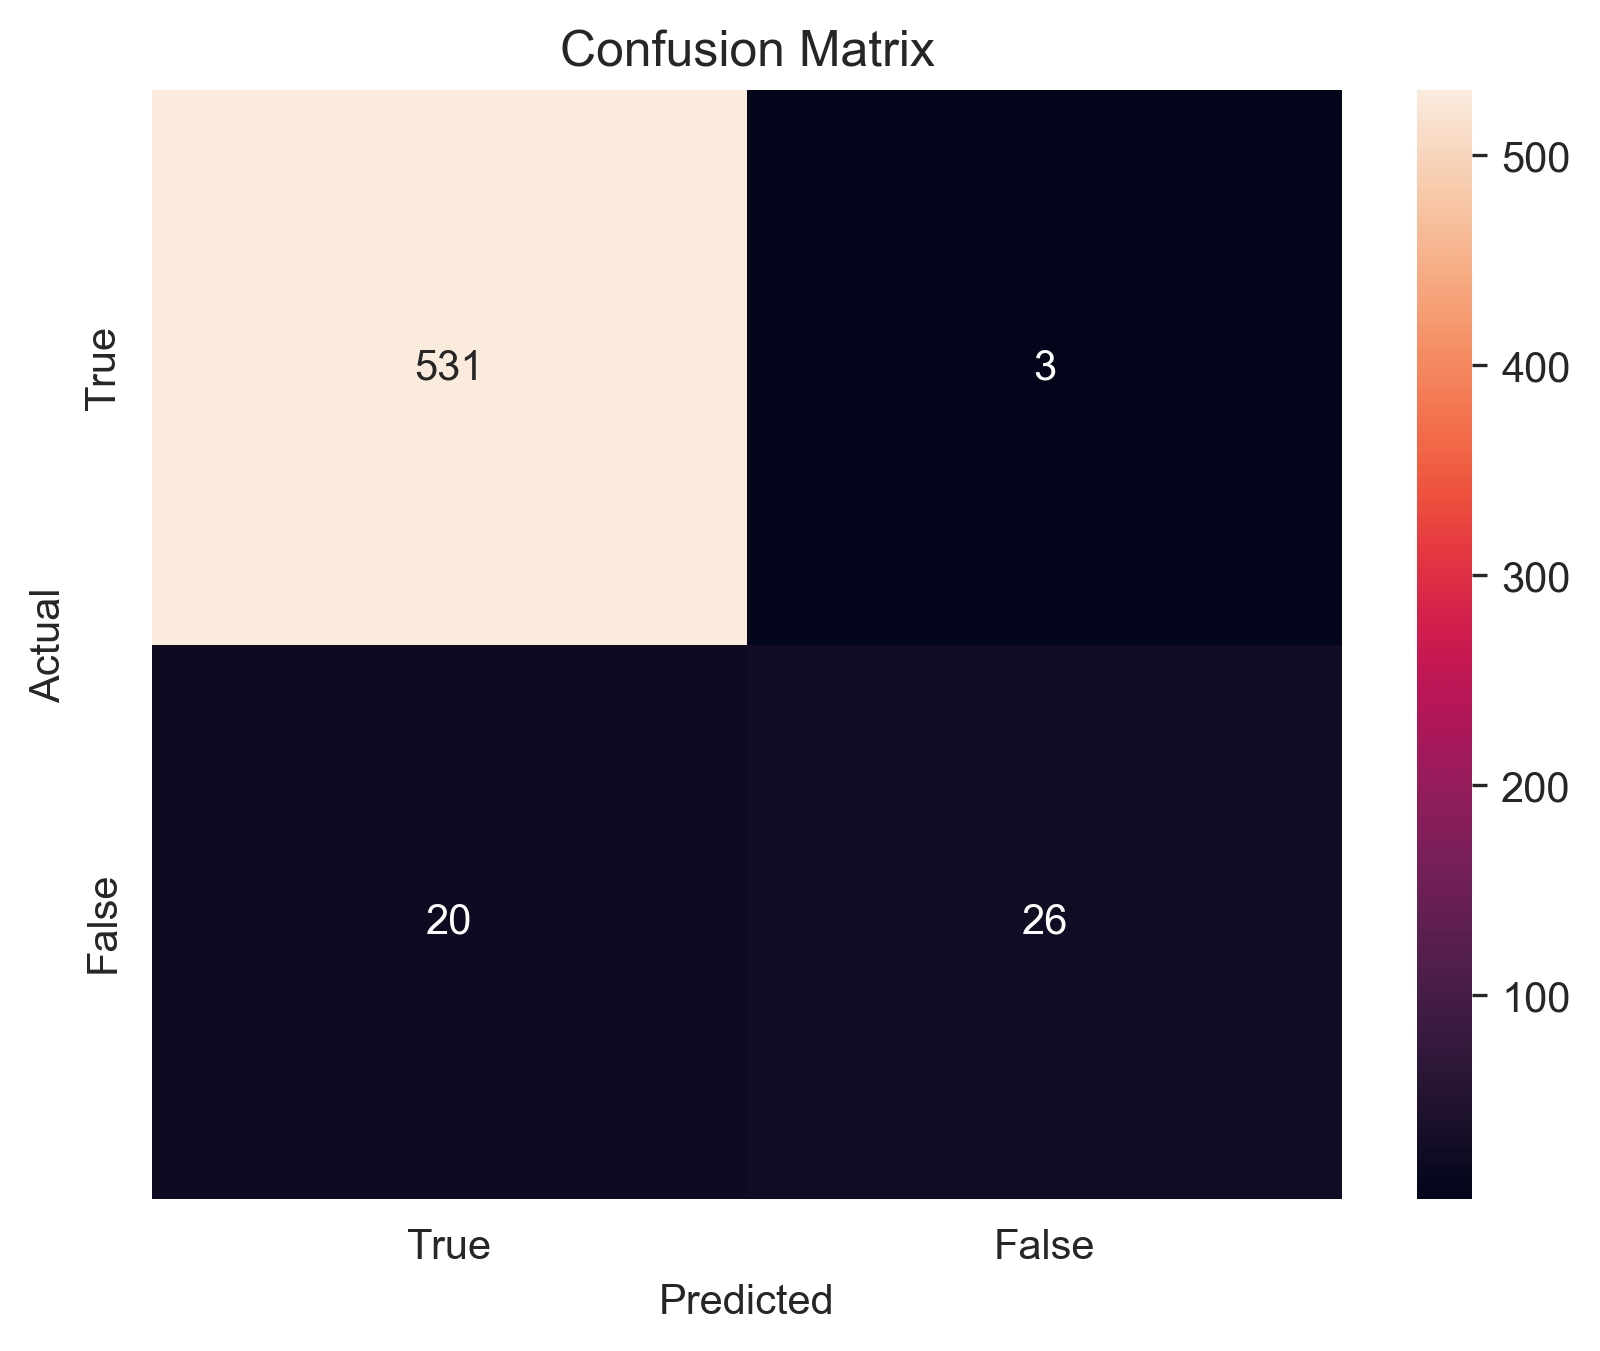

<Figure size 1920x1440 with 0 Axes>

In [10]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_1.png')

In [11]:
importance = log_model_1.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

            Feature  Importance  Absolute Importance
20         max_hits   -3.590585             3.590585
1       total_games    2.369665             2.369665
3        total_runs    1.768152             1.768152
19           max_HR   -1.211142             1.211142
9         total_RBI    1.055779             1.055779
2     total_at_bats    0.643820             0.643820
8   total_home_runs    0.620080             0.620080
13         total_SO    0.572033             0.572033
6     total_doubles   -0.565513             0.565513
7     total_triples    0.396299             0.396299
5       total_walks   -0.367935             0.367935
12         total_BB   -0.367935             0.367935
16         total_SH    0.349785             0.349785
25              SLG    0.308063             0.308063
23      batting_avg    0.270812             0.270812
11         total_CS   -0.235477             0.235477
10         total_SB    0.214957             0.214957
17         total_SF   -0.212023             0.

In [11]:
# Feature Importance Visualization (if supported)
if hasattr(log_model_1, 'feature_importances_'):
    importances = log_model_1.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances)
    plt.title("Feature Importances")
    plt.show()

# Player Data Comparison for False Positives
false_positive_example = Awards_Batting_HoF_df.loc[false_positives].copy()
plt.figure(figsize=(12, 8))
sns.barplot(data=false_positive_example.melt(id_vars='playerID', value_vars=X.columns), x='variable', y='value')
plt.xticks(rotation=90)
plt.title("Features of False Positive Players")
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
visual_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Actual': y_test_reset,
    'Predicted': y_pred_reset
})
plt.figure(figsize=(12, 8))
sns.scatterplot(data=visual_df, x='PCA1', y='PCA2', hue='Actual', style='Predicted')
plt.title("PCA of Model Predictions")
plt.show()

# Decision Boundary Visualization (only two features for logistic regression)
X_test_sample = X_test_scaled[:, :2]  # Use the first two features
log_model_2 = LogisticRegression().fit(X_train_scaled[:, :2], y_train)
plt.figure(figsize=(12, 8))
plot_decision_regions(X_test_sample, y_test_reset.to_numpy(), clf=log_model_2, legend=2)
plt.title("Model Decision Boundary (First Two Features)")
plt.show()


NameError: name 'false_positives' is not defined

Feature Engineering career stats rather than season stats.

In [12]:
X = Awards_Batting_HoF_df[[
    'max_hits'
]].fillna(0)  # Replace NaNs with 0

# Ensure the target variable has no missing values
y = Awards_Batting_HoF_df['HOF_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_2 = LogisticRegression(solver='liblinear')
log_model_2.fit(X_train_scaled, y_train)

y_pred = log_model_2.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2640    0]
 [ 230    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2640
         1.0       0.00      0.00      0.00       230

    accuracy                           0.92      2870
   macro avg       0.46      0.50      0.48      2870
weighted avg       0.85      0.92      0.88      2870



c:\Users\cltro\OneDrive\Documents\CSC 5610\csc5610base\.csc5610base\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cltro\OneDrive\Documents\CSC 5610\csc5610base\.csc5610base\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cltro\OneDrive\Documents\CSC 5610\csc5610base\.csc5610base\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

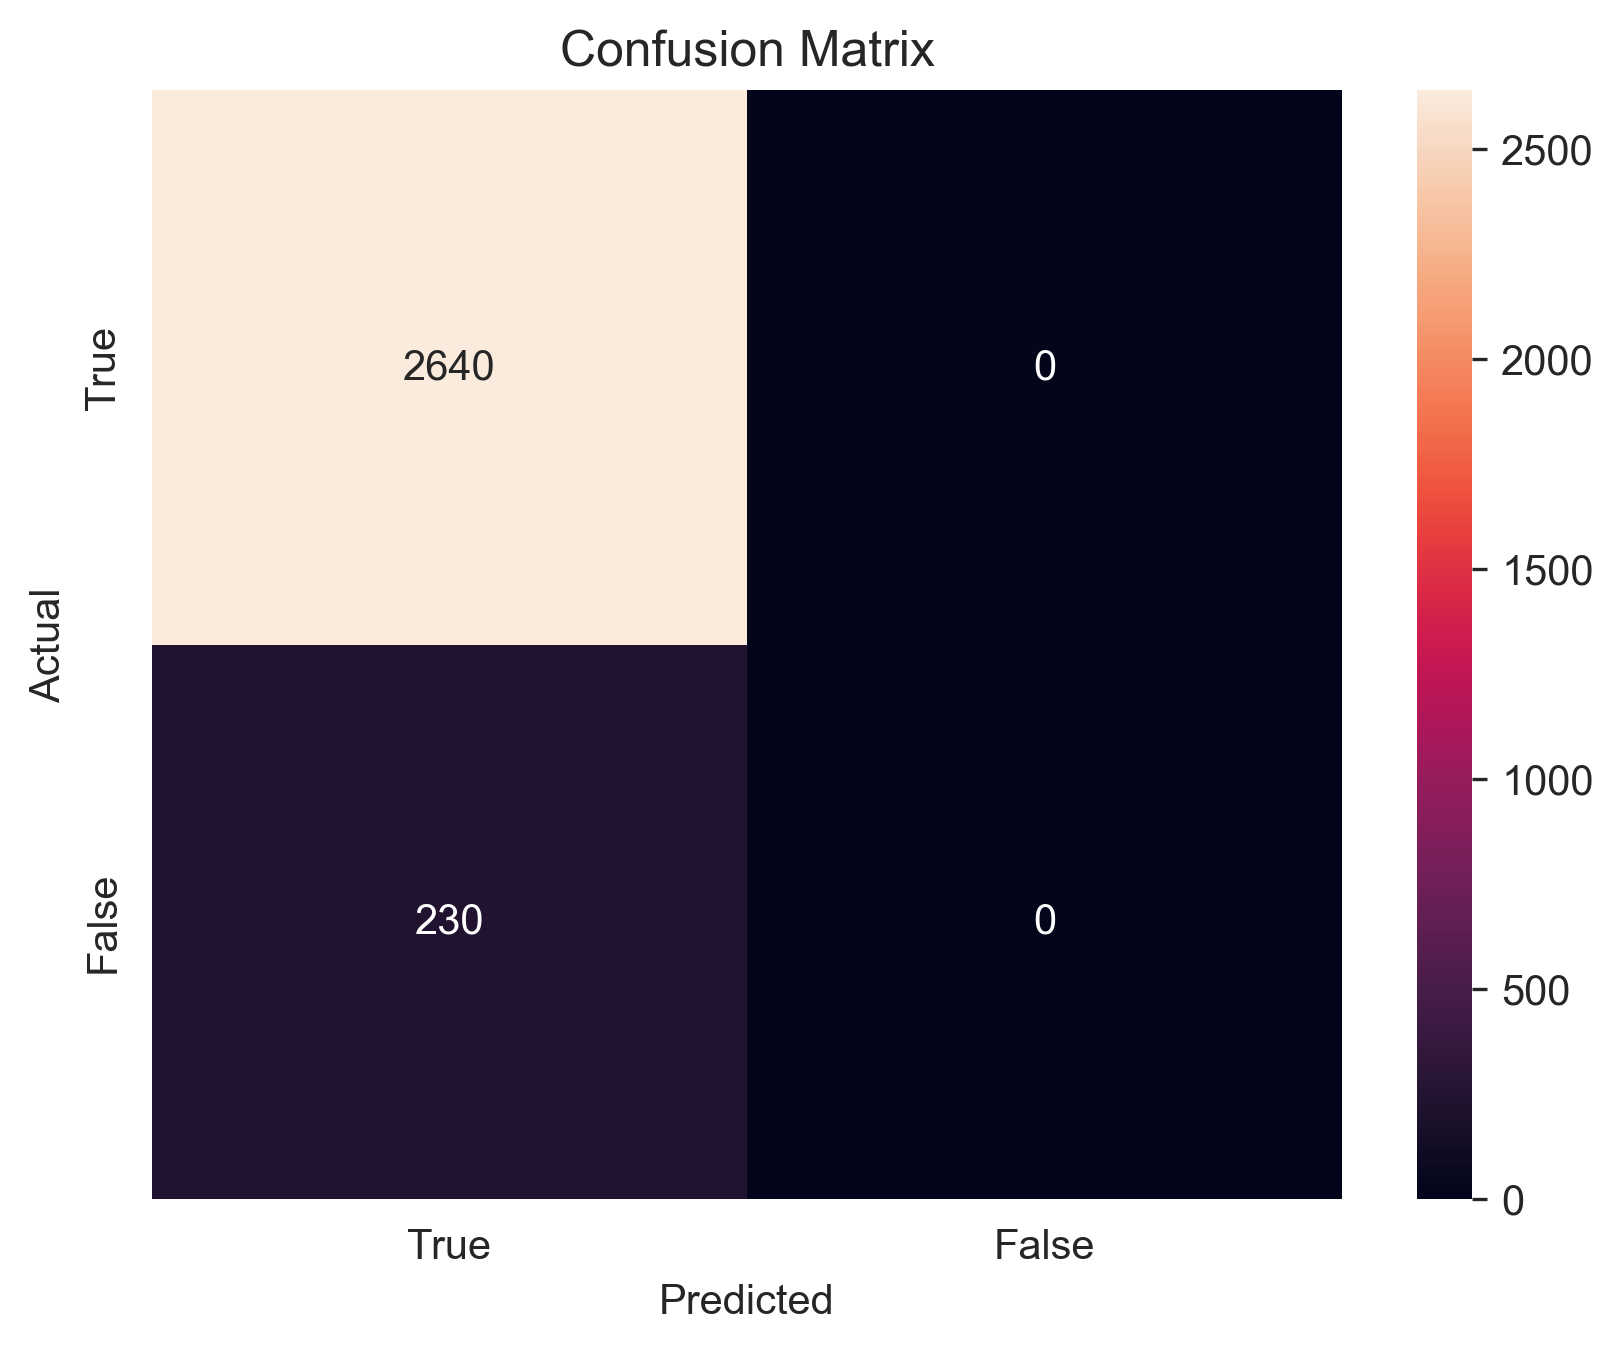

<Figure size 1920x1440 with 0 Axes>

In [13]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_2.png')

3.932845606236214e-22


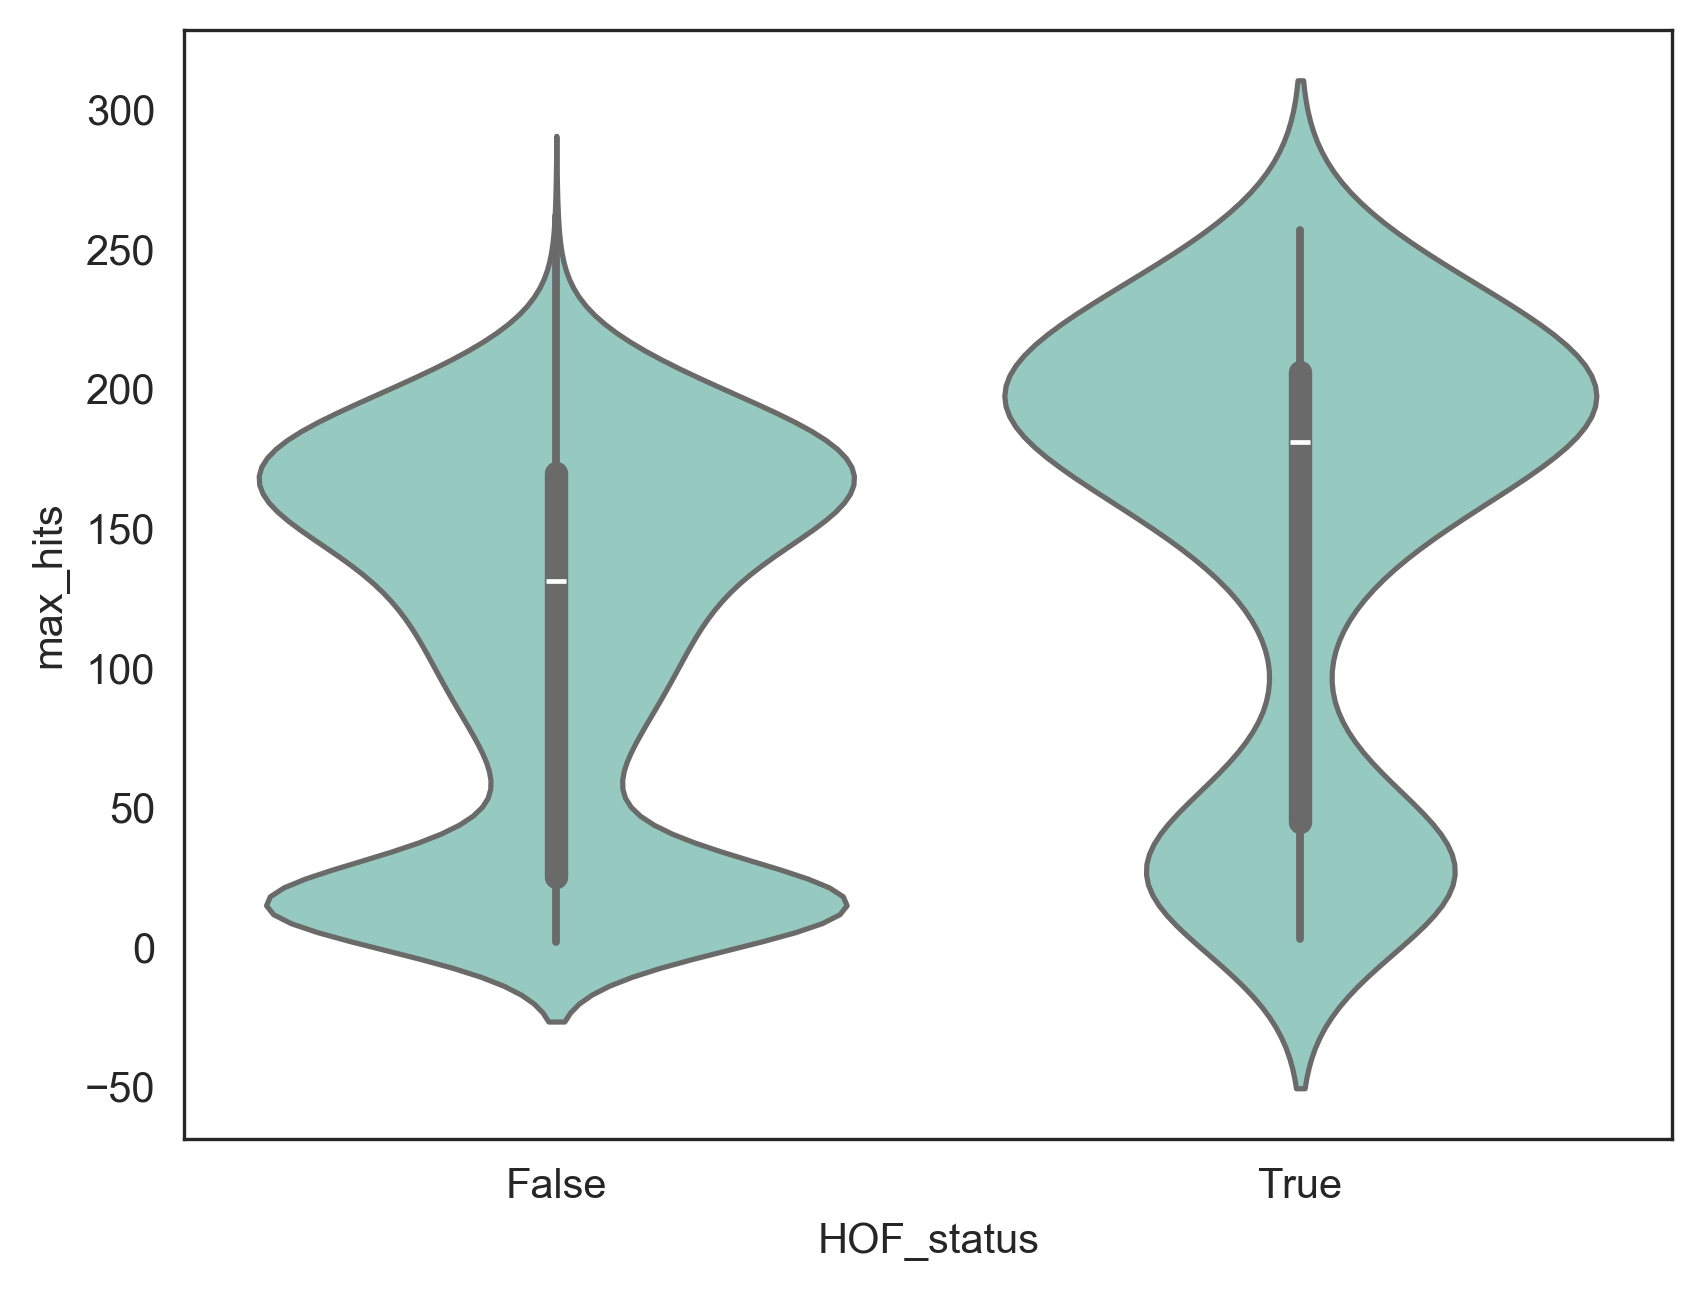

In [14]:
sns.violinplot(x=Awards_Batting_HoF_df['HOF_status'], y=Awards_Batting_HoF_df["max_hits"])

samples_by_group = []
for value in set(Awards_Batting_HoF_df['HOF_status']):
    mask = Awards_Batting_HoF_df['HOF_status'] == value
    samples_by_group.append(Awards_Batting_HoF_df["max_hits"][mask])
    
stat, p = stats.kruskal(*samples_by_group)
print(p)

In [15]:
X = Awards_Batting_HoF_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 
    'total_singles'
]].fillna(0)  # Replace NaNs with 0

# Ensure the target variable has no missing values
y = Awards_Batting_HoF_df['HOF_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_preFE = LogisticRegression(solver='liblinear')
log_model_preFE.fit(X_train_scaled, y_train)

y_pred = log_model_preFE.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True).astype(np.int_)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index).astype(np.int_)

Confusion Matrix:
[[530   4]
 [ 21  25]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       534
         1.0       0.86      0.54      0.67        46

    accuracy                           0.96       580
   macro avg       0.91      0.77      0.82       580
weighted avg       0.95      0.96      0.95       580



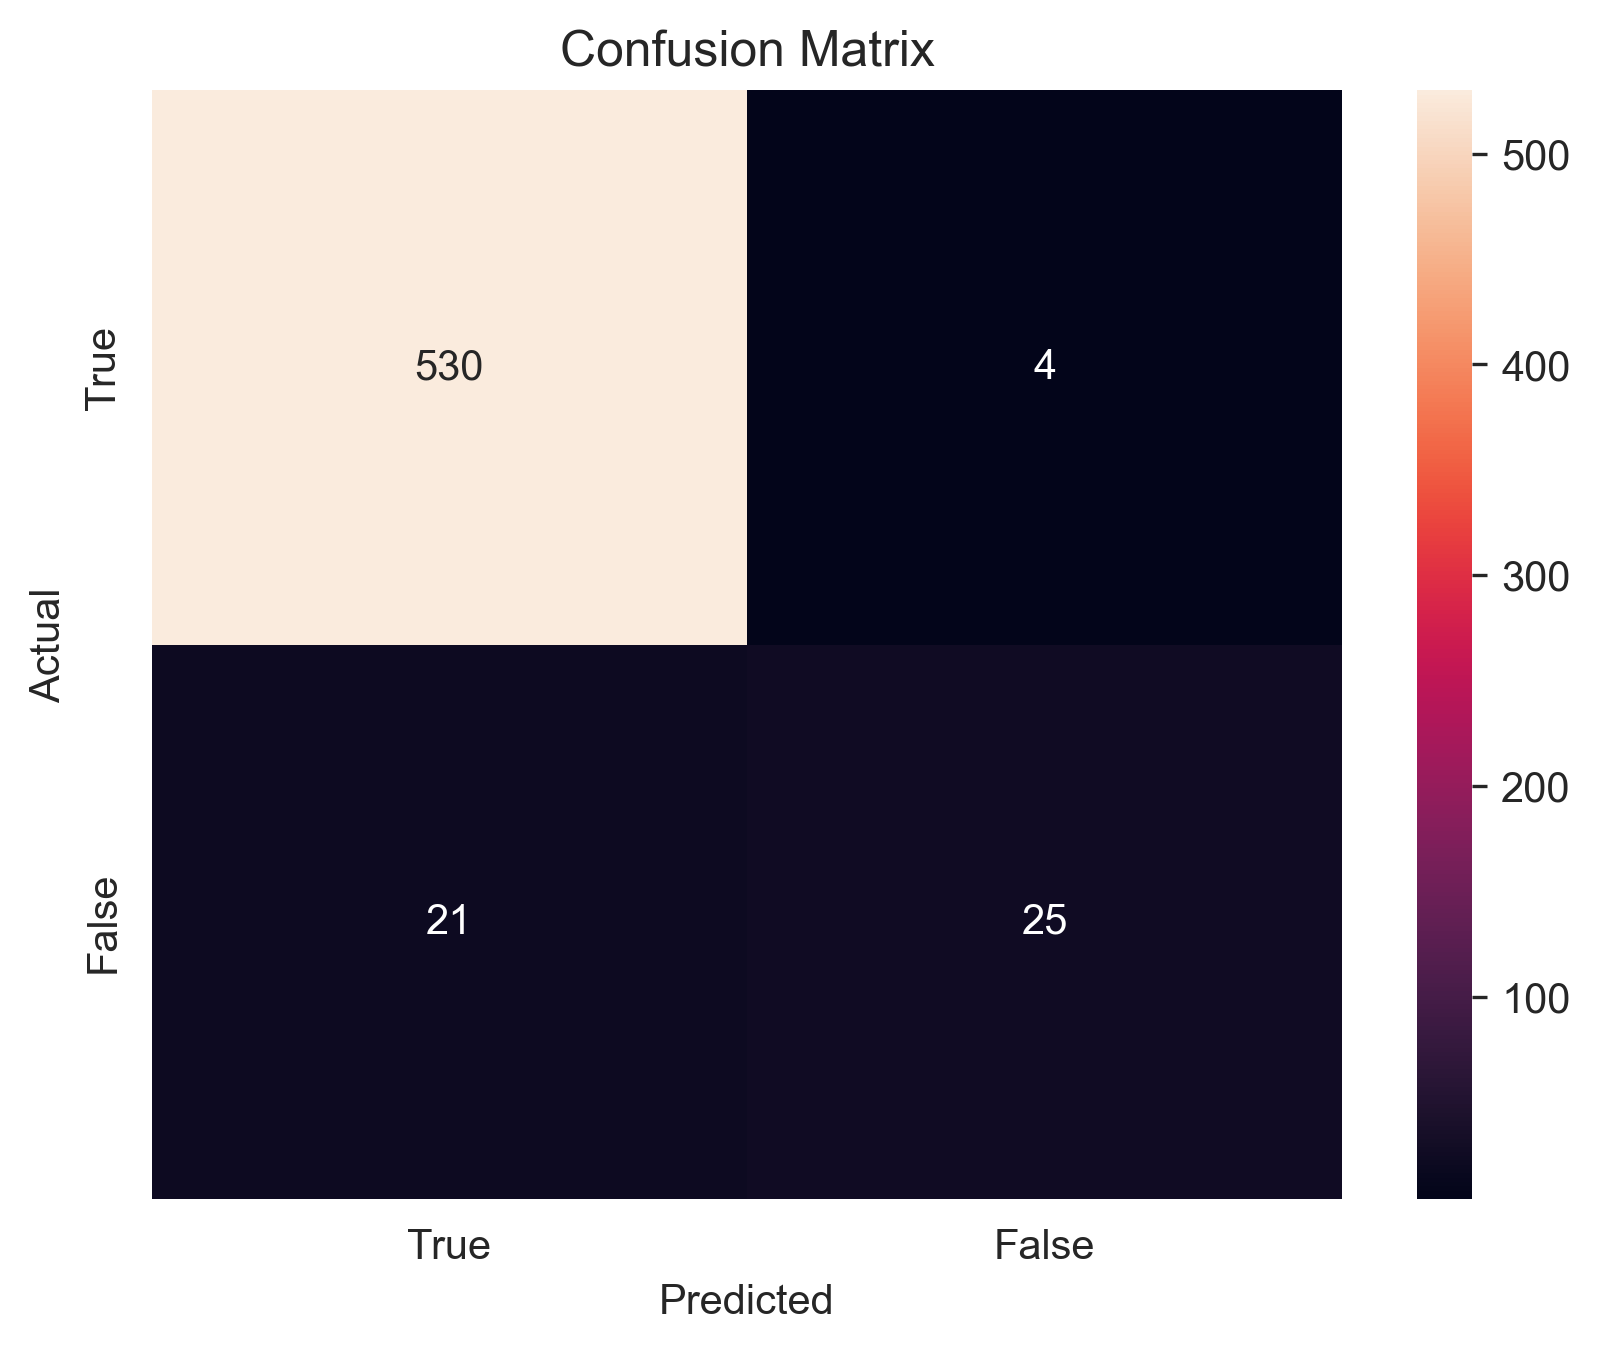

<Figure size 1920x1440 with 0 Axes>

In [16]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_preFE.png')

In [17]:
importance = log_model_preFE.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

            Feature  Importance  Absolute Importance
1       total_games    3.351450             3.351450
3        total_runs    2.359041             2.359041
2     total_at_bats   -1.219003             1.219003
19    total_singles   -0.909549             0.909549
6     total_doubles   -0.885801             0.885801
4        total_hits   -0.821172             0.821172
9         total_RBI    0.683327             0.683327
0      years_played    0.610750             0.610750
17         total_SF   -0.509763             0.509763
16         total_SH    0.478377             0.478377
12         total_BB   -0.373513             0.373513
5       total_walks   -0.373513             0.373513
13         total_SO    0.298793             0.298793
11         total_CS   -0.292571             0.292571
15        total_HBP   -0.199583             0.199583
8   total_home_runs   -0.170205             0.170205
7     total_triples    0.071452             0.071452
10         total_SB   -0.055048             0.